<a href="https://colab.research.google.com/github/Shavrau/AmFatec2025/blob/main/TreinamentoPrevis%C3%A3oTemperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicção de temperatura

##Libs Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

##Configuração Api

Chamada da api

In [6]:
API_KEY = "01c3e76e6cb1953c7931d7301b44748f"
cidade = "São Paulo"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={cidade}&appid={API_KEY}&units=metric"

response = requests.get(url)
dados = response.json()

,data,temp,umidade,vento
0,2025-04-11 21:00:00,23.56,76,4.45
1,2025-04-12 00:00:00,22.19,81,3.20
2,2025-04-12 03:00:00,20.38,82,3.46
3,2025-04-12 06:00:00,20.49,82,3.18
4,2025-04-12 09:00:00,16.44,79,3.54
5,2025-04-12 12:00:00,22.63,71,3.43
6,2025-04-12 15:00:00,24.49,53,3.07
7,2025-04-12 18:00:00,26.03,48,3.23
8,2025-04-12 21:00:00,21.39,76,5.04
9,2025-04-13 00:00:00,19.96,83,3.40


Transformação em dataframe

In [8]:
dados_tratados = []
for previsao in dados['list']:
    dados_tratados.append({
        'data': previsao['dt_txt'],
        'temp': previsao['main']['temp'],
        'umidade': previsao['main']['humidity'],
        'vento': previsao['wind']['speed']
    })
df = pd.DataFrame(dados_tratados)

df.head()

,data,temp,umidade,vento
0,2025-04-11 21:00:00,23.56,76,4.45
1,2025-04-12 00:00:00,22.19,81,3.20
2,2025-04-12 03:00:00,20.38,82,3.46
3,2025-04-12 06:00:00,20.49,82,3.18
4,2025-04-12 09:00:00,16.44,79,3.54


##Limpeza e Análise Exploratória

In [9]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     40 non-null     object 
 1   temp     40 non-null     float64
 2   umidade  40 non-null     int64  
 3   vento    40 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [11]:
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)

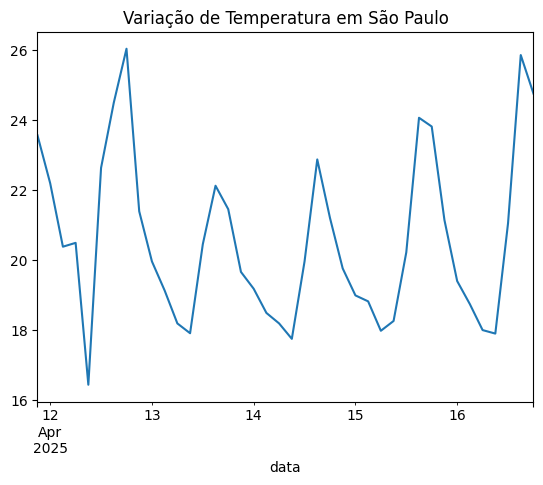

In [12]:
df['temp'].plot(title='Variação de Temperatura em São Paulo')
plt.show()

##Modelagem

In [13]:
df['dia_da_semana'] = df.index.dayofweek

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['umidade', 'vento', 'dia_da_semana']]
y = df['temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("Acurácia:", modelo.score(X_test, y_test))

Acurácia: 0.6646292277767194
